# mnist 데이터를 이용하여 cnn으로 분류작업 하기

In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml

dataset = fetch_openml("mnist_784", parser="auto")

In [2]:
import numpy as np
import torch

X = torch.tensor(dataset.data.to_numpy(np.float32))
y = torch.tensor(dataset.target.to_numpy(np.int64))

In [3]:
X = X.reshape(-1, 1, 28, 28)
X.shape

torch.Size([70000, 1, 28, 28])

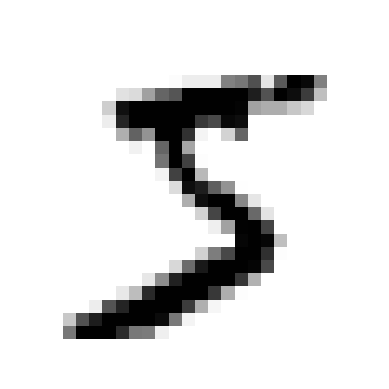

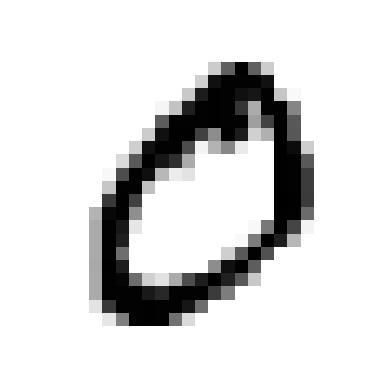

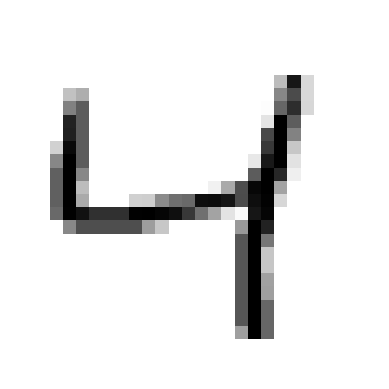

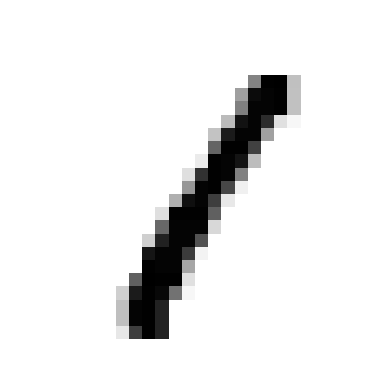

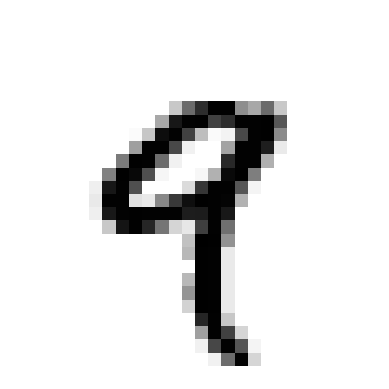

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
    image = X[i, 0]
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
model = CNN(100)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [7]:
def train(model, optimizer, criterion):
    for epoch in range(100):
        y_pred = model(X)

        loss = criterion(y_pred, y)
        print(f"Epoch: {epoch} / Loss: {loss}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


train(model, optimizer, criterion)

Epoch: 0 / Loss: 7.783238410949707
Epoch: 1 / Loss: 16.458087921142578
Epoch: 2 / Loss: 3.877819299697876
Epoch: 3 / Loss: 2.386868715286255
Epoch: 4 / Loss: 2.318956136703491
Epoch: 5 / Loss: 2.288505792617798
Epoch: 6 / Loss: 2.2649567127227783
Epoch: 7 / Loss: 2.244133710861206
Epoch: 8 / Loss: 2.2242298126220703
Epoch: 9 / Loss: 2.20405912399292
Epoch: 10 / Loss: 2.1828348636627197
Epoch: 11 / Loss: 2.1599655151367188
Epoch: 12 / Loss: 2.1347663402557373
Epoch: 13 / Loss: 2.10646390914917
Epoch: 14 / Loss: 2.074136734008789
Epoch: 15 / Loss: 2.0367608070373535
Epoch: 16 / Loss: 1.993169903755188
Epoch: 17 / Loss: 1.941954255104065
Epoch: 18 / Loss: 1.881422758102417
Epoch: 19 / Loss: 1.8098448514938354
Epoch: 20 / Loss: 1.7259526252746582
Epoch: 21 / Loss: 1.6294671297073364
Epoch: 22 / Loss: 1.5222984552383423
Epoch: 23 / Loss: 1.4094611406326294
Epoch: 24 / Loss: 1.2969964742660522
Epoch: 25 / Loss: 1.1897594928741455
Epoch: 26 / Loss: 1.0914260149002075
Epoch: 27 / Loss: 1.00436

In [8]:
y_pred = model(X[:5])
y_pred.shape

torch.Size([5, 10])

In [9]:
y_pred.argmax(1)

tensor([5, 0, 4, 1, 9])